# Customer sentiment and trend analysis:-
Customer sentiment and trend analysis is the process of using natural language processing (NLP), machine learning, and text analysis to identify and extract subjective information from customer reviews, social media posts, or other feedback. It categorizes feedback as positive, negative, or neutral to understand customer attitudes toward a product, service, or brand.

# Understanding the Data:-

Importing The required python packages

In [329]:
# Filtering out the warnings
import warnings
warnings.filterwarnings("ignore")
#Load the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk as nltk

Reading & Loading data sets

dataset1:

In [330]:
#Load & read the dataset
df1 = pd.read_csv("/content/train2.csv", encoding='latin1') # or 'ISO-8859-1' or any other suitable encoding
df1.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð??±!!! ð???ð???ð???ð???ð??¦ð??¦ð??¦
4,0,factsguide: society now #motivation


In [331]:
df1 = df1.rename(columns={'tweet': 'Text'})
df1.head()

,label,Text
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð??±!!! ð???ð???ð???ð???ð??¦ð??¦ð??¦
4,0,factsguide: society now #motivation


In [332]:
df1.label.value_counts()

,count
label,
0,29720
1,2242


dataset2:

In [333]:
#Load & read the dataset
df2 = pd.read_csv("/content/Twitter_Data.csv", on_bad_lines='skip', quoting=3, encoding='latin1') # or 'ISO-8859-1', 'cp1252' or any other suitable encoding
df2.head()

,Text,category
0,when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...,-1.0
1,talk all the nonsense and continue all the drama will vote for modi,0.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming...,1.0
4,answer who among these the most powerful world leader today trump putin modi may,1.0


In [334]:
# Switch columns
df2 = df2[['category', 'Text']]

In [335]:
df2.head(10)

,category,Text
0,-1.0,when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...
1,0.0,talk all the nonsense and continue all the drama will vote for modi
2,1.0,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax
3,1.0,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming...
4,1.0,answer who among these the most powerful world leader today trump putin modi may
5,0.0,kiya tho refresh maarkefir comment karo
6,NaN,"""surat women perform yagna seeks divine grace for narendra modi become again"
7,0.0,""""
8,0.0,this comes from cabinet which has scholars like modi smriti and hema time introspect
9,1.0,with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho


In [336]:
df2 = df2.rename(columns={'category': 'label'})

In [337]:
df2.label.value_counts()

,count
label,
1.0,72250
0.0,55213
-1.0,35510


In [338]:
# Delete rows where 'Label' column has a value of 0 & 1
df2 = df2[df2['label'] != 0]
df2 = df2[df2['label'] != -1]
df2 = df2.dropna(subset=['label'])

In [339]:
rows_to_delete = 44772
df2 = df2.iloc[rows_to_delete:]
# Save the cleaned dataset to a new CSV file
df2.to_csv('cleaned_dataset.csv', index=False)


In [340]:
df2 = pd.read_csv('/content/cleaned_dataset.csv')

In [341]:
df2.head(5)

,label,Text
0,1.0,""""
1,1.0,the people the country have made their minds they want government with absolute majority modi
2,1.0,modi has screwed you guys many times that your nasha already come down several notches
3,1.0,proud indian are nearly other voters india who also also want modi lose elections because bjp will not get more than votes polled 2019 elections
4,1.0,chokidhar modi people are more foolish believe your political stunts


merging the datasets

In [342]:
data = pd.concat([df1,df2])
data.tail()

,label,Text
27473,1.0,objective cover everything from akhlaq ramalingam question modi and rahul alike people will like you also please dont debate with 1000 people panel shouldnt more than including the anchor best luck
27474,1.0,raga knows dat wont spared modi courts for his cheating corruption dat wants modi out power hook crook setting wid pak china bcoz dis only word gaddar
27475,1.0,engine growth modi unveils indias first 12000 electric locomotive bihar
27476,1.0,modi promised 2014 lok sabha elections that best orop will given the soldiers india but the orop given much less than the promised fact soldiers are cheated sadly goudi media joining hands with th...
27477,1.0,have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take ac...


# Cleaning dataset:-

In [343]:
# Handling Missing Values
# Check for missing values in "Label" and "Text" columns
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
label    0
Text     1
dtype: int64


In [344]:
# Drop rows where "Text" or "Label" is missing
data = data.dropna(subset=['Text', 'label'])

In [345]:
# Text Cleaning
# Define a function to clean the "Text" column
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespaces
    text = text.strip()

    return text


In [346]:
import re
import string
# Apply the clean_text function to the "Text" column
data['Cleaned_Text'] = data['Text'].apply(clean_text)

In [347]:
# Encoding Labels
# If the "Label" column is categorical, encode it
data['label'] = data['label'].astype('category')
data['label_encoded'] = data['label'].cat.codes  # Convert to numeric codes

In [348]:
#How many rows are negative (0) or psitive (1)
data.label.value_counts()

,count
label,
0.0,29720
1.0,29719


In [349]:
data.head()

,label,Text,Cleaned_Text,label_encoded
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,0
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,0
2,0.0,bihday your majesty,bihday your majesty,0
3,0.0,#model i love u take with u all the time in urð??±!!! ð???ð???ð???ð???ð??¦ð??¦ð??¦,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,0
4,0.0,factsguide: society now #motivation,factsguide society now motivation,0


In [350]:
# Removing Duplicates
# Check for duplicates in "Text" and "Label"
duplicates = data.duplicated(subset=['Text', 'label']).sum()
print(f"\nNumber of duplicates: {duplicates}")


Number of duplicates: 3380


In [351]:
# Remove duplicates
data = data.drop_duplicates(subset=['Text', 'label'])
# Save the cleaned dataset
data.to_csv('cleaned_dataset.csv', index=False)

In [352]:
#How many rows are negative (0) or psitive (1)
data.label.value_counts()

,count
label,
1.0,28542
0.0,27517


Exploring the data set


In [353]:
import re
import pandas as pd

# Function to remove non-English characters, handling NaN and other data types
def remove_non_english(text):
    """
    Removes non-English characters from a text string, handling NaN and other data types.

    Args:
        text: The input text string.

    Returns:
        The text string with non-English characters removed.
    """
    # Convert to string and replace NaN with an empty string
    text = str(text)
    text = text.replace('nan', '')  # Replace NaN values with an empty string
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Assuming you have your data in a pandas DataFrame called 'data' with a column 'Text'
# Apply the function to the 'Text' column
data['Text'] = data['Text'].apply(remove_non_english)

In [354]:
data = pd.read_csv('/content/cleaned_dataset.csv')
data.head()

,label,Text,Cleaned_Text,label_encoded
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,0
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,0
2,0.0,bihday your majesty,bihday your majesty,0
3,0.0,#model i love u take with u all the time in urð??±!!! ð???ð???ð???ð???ð??¦ð??¦ð??¦,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,0
4,0.0,factsguide: society now #motivation,factsguide society now motivation,0


In [355]:
data = data.drop('label', axis=1)
data = data.drop('Text', axis=1)
data = data.rename(columns={'Cleaned_Text': 'Text'})
data = data.rename(columns={'label_encoded': 'label'})
data=data[['label', 'Text']]
data.head()

,label,Text
0,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
1,0,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð± ððððð¦ð¦ð¦
4,0,factsguide society now motivation


In [356]:
#DataFrame.shape ==>Return a tuple representing the dimensionality of the DataFrame.
data.shape

(56059, 2)

In [357]:
#dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56059 entries, 0 to 56058
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   56059 non-null  int64 
 1   Text    56022 non-null  object
dtypes: int64(1), object(1)
memory usage: 876.0+ KB


In [358]:
#DataFrame.describe==>Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
#Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.
data.describe()

,label
count,56059.000000
mean,0.509142
std,0.499921
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [359]:
#How many rows are negative (0) or psitive (1)
data.label.value_counts()

,count
label,
1,28542
0,27517


In [360]:
#How many rows are negative (0) or psitive (1)
#persentage
data.label.value_counts(normalize= True)

,proportion
label,
1,0.509142
0,0.490858


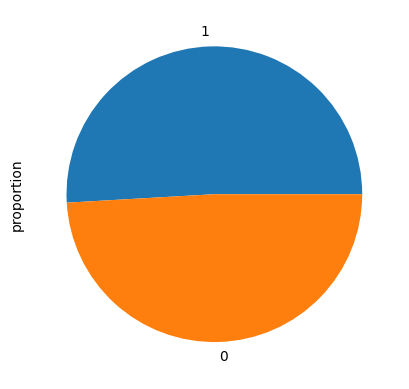

In [361]:
data.label.value_counts(normalize= True).plot.pie()
plt.show()


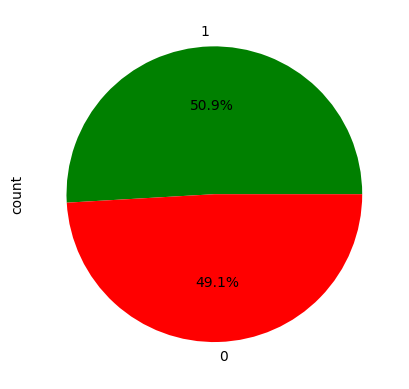

In [362]:
# Change pie chart colors here
colors = ["green", "red", "magenta", "orange"]
data.label.value_counts().plot.pie(colors = colors, autopct = "%1.1f%%")
plt.show()

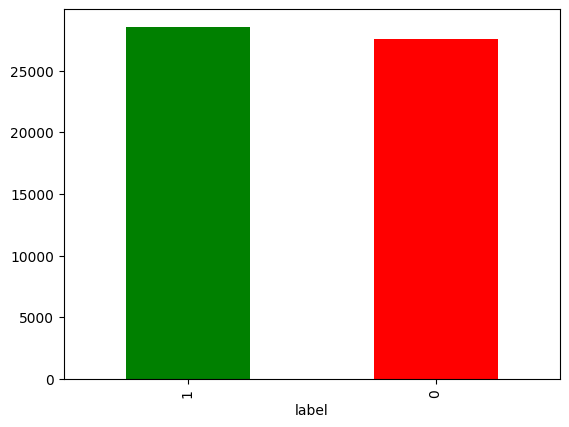

In [363]:
colors = ["green", "red", "magenta", "orange"]
data.label.value_counts().plot.bar(color = colors)
plt.show()

In [364]:
#How many NULLs/ missing values
data.isnull().value_counts()

label  Text 
False  False    56022
       True        37
Name: count, dtype: int64

# Data Preparation-Pre-processing text data:-

Ultimate goals from the Pre-processing text data is To bring the text into a form that is predictable and analyzable for our task by Reducing the corpus of words that exposed to the model Explicitly correlate the word with similar meaning.
Cleaning up the text data is necessary to highlight attributes that we are going to want our model to pick up on. Cleaning (or pre-processing) the data typically consists of number of steps:
1. remove punctuation
2. tokenization
3. remove stop-words
4. lemmatization/stemming
5. vectorization/word embedding
6. feture engineering



Remove punctuation & Converting text to lowercase:-


In [365]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [366]:
#add lower to teh remove_punc function
#list comprhansion
#lambda function
#adding join to join chars into words
def remove_punct(text):

    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

# Apply the function only to string values, handling potential NaNs
data['Text_nopunc'] = data['Text'].apply(lambda x: remove_punct(x.lower()) if isinstance(x, str) else x)

data.head()

,label,Text,Text_nopunc
0,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
1,0,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked
2,0,bihday your majesty,bihday your majesty
3,0,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,model i love u take with u all the time in urð± ððððð¦ð¦ð¦
4,0,factsguide society now motivation,factsguide society now motivation


In [367]:
pd.set_option('display.max_colwidth', 200) #customize display settings.

Tokenization:-

Tokenization is one of the most common tasks when it comes to working with text data Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.


Tokenization using NLTK :-

This is important because the meaning of the text could easily be interpreted by analyzing the words present in the text. The final Goal of Tokenization is : Creating Vocabulary

In [368]:
from nltk.tokenize import word_tokenize #import nltk

In [369]:
import re # Import the regular expression module

In [370]:
!pip install nltk
import nltk

nltk.download('punkt')
def tokenize(text):
 # Convert the input to a string if it is not already
    if not isinstance(text, str):
        text = str(text)
    tokens = word_tokenize(text)
    return tokens

data['Text_tokenized'] = data['Text_nopunc'].apply(lambda x: tokenize(x))

data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,Text,Text_nopunc,Text_tokenized
0,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,"[user, when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]"
1,0,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,"[user, user, thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]"
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,0,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,"[model, i, love, u, take, with, u, all, the, time, in, urð±, ððððð¦ð¦ð¦]"
4,0,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]"


Remove stopwords:-

Stopwords are common words that are present in the text but generally do not contribute to the meaning of a sentence. They hold almost no importance for the purposes of information retrieval and natural language processing. They can safely be ignored without sacrificing the meaning of the sentence. For example – ‘the’ and ‘a’.

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

The NLTK package has a separate package of stop words that can be downloaded. NLTK has stop words more than 16 languages which can be downloaded and used. Once it is downloaded, it can be passed as an argument indicating it to ignore these words.

In [371]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [372]:
#Removing stopwords
stopwords_En = nltk.corpus.stopwords.words('english')
#Expectation no and not
stopwords_En.remove('no')
stopwords_En.remove('not')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

data['Text_nostop'] = data['Text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,Text,Text_nopunc,Text_tokenized,Text_nostop
0,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,"[user, when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]","[user, father, dysfunctional, selfish, drags, kids, dysfunction, run]"
1,0,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,"[user, user, thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]","[user, user, thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapointed, getthanked]"
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,0,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,"[model, i, love, u, take, with, u, all, the, time, in, urð±, ððððð¦ð¦ð¦]","[model, love, u, take, u, time, urð±, ððððð¦ð¦ð¦]"
4,0,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"


_____________________________________________________________

lemmatizaton:-

Lemmatizing : The process of grouping together the inflected forms of a word so they can be analyzed as a single term. Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language lemmatizing is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word.  So again : play, playing, played and plays  would all be simplified down to play, because that's the root of the word. Each variation carries the same meaning just with slightly different tense.  Will use the WordNet lemmatizer. This is probably the most popular lemmatizer.  WordNet is a collection of nouns, verbs, adjective and adverbs that are grouped together in sets of synonyms, each expressing a distinct concept.  This lemmatizer runs off of this corpus of synonyms, so given a word, it will track that word to its synonyms, and then the distinct concept that that group of words represents.

In [373]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [374]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [375]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['Text_lemmatized'] = data['Text_nostop'].apply(lambda x: lemmatizing(x))

data.head(5)

,label,Text,Text_nopunc,Text_tokenized,Text_nostop,Text_lemmatized
0,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,"[user, when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]","[user, father, dysfunctional, selfish, drags, kids, dysfunction, run]","[user, father, dysfunctional, selfish, drag, kid, dysfunction, run]"
1,0,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,"[user, user, thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]","[user, user, thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapointed, getthanked]","[user, user, thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]"
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesty]"
3,0,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,"[model, i, love, u, take, with, u, all, the, time, in, urð±, ððððð¦ð¦ð¦]","[model, love, u, take, u, time, urð±, ððððð¦ð¦ð¦]","[model, love, u, take, u, time, urð±, ððððð¦ð¦ð¦]"
4,0,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguide, society, motivation]"


Create function to remove punctuation, tokenize, remove stopwords, and lemmat


In [376]:
import nltk
import string
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()

def clean_text(text):
    # Check if text is a string before processing
    if isinstance(text, str):
        text = "".join([word.lower() for word in text if word not in string.punctuation])
        tokens = word_tokenize(text)
        text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords_En])
        return text
    # If text is not a string (e.g., float), return it as is or handle it appropriately
    else:
        return str(text)  # or return "" or handle NaN values differently

data['cleaned_Text'] = data['Text'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [377]:
data.shape

(56059, 7)

 Vectorizing text data:-

Vectorizing : The process that we use to convert text to a form that Python and a machine learning model can understand,will Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

This is defined as the process of encoding text as integers to create feature vectors.  A feature vector is an n-dimensional vector of numerical features that represent some object. So in our context, that means we'll be taking an individual text message and converting it to a numeric vector that represents that text message.

Vectorizing Data: TF-IDF

In [378]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,3))
features_tfidf = tfidf.fit_transform(data['cleaned_Text'])
features_tfidf_df = pd.DataFrame(features_tfidf.toarray())
features_tfidf_df.columns = tfidf.get_feature_names_out()

In [379]:
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)

(56059, 931777)
Sparse Matrix :
   (0, 846510)	0.05790614325468645
  (0, 256940)	0.11486034330049076
  (0, 216204)	0.23753206969008686
  (0, 717799)	0.2008359613461532
  (0, 211178)	0.19105266957327555
  (0, 412974)	0.13586093527929516
  (0, 216200)	0.23753206969008686
  (0, 692007)	0.13390054173056676
  (0, 850150)	0.16944206671556933
  (0, 257345)	0.24642048128204427
  (0, 216207)	0.24642048128204427
  (0, 717803)	0.24642048128204427
  (0, 211205)	0.24642048128204427
  (0, 413108)	0.24642048128204427
  (0, 216203)	0.24642048128204427
  (0, 850154)	0.24642048128204427
  (0, 257346)	0.24642048128204427
  (0, 216208)	0.24642048128204427
  (0, 717804)	0.24642048128204427
  (0, 211206)	0.24642048128204427
  (0, 413109)	0.24642048128204427
  (1, 846510)	0.0826001791346365
  (1, 799286)	0.08357283878696355
  (1, 464679)	0.15857639595932518
  (1, 166597)	0.0986591605833882
  :	:
  (56058, 170606)	0.1522153909834309
  (56058, 379702)	0.1522153909834309
  (56058, 47399)	0.1522153909834309
  (5

Feture engineering:-

Feature engineering in the provided code involves extracting various features from the text data to improve model performance.

First, sentiment polarity and subjectivity are extracted using TextBlob.

Next, emotions associated with the text are identified using NRCLex.

Then, the length of the text is calculated.

Finally, Part-of-Speech (POS) tagging is performed using NLTK, and topic modeling is applied with Latent Dirichlet Allocation (LDA) to identify underlying topics in the text.

In [380]:
from textblob import TextBlob
data['sentiment_polarity'] = data['cleaned_Text'].apply(lambda x:
                                                       TextBlob(x).sentiment.polarity)
data['sentiment_subjectivity'] = data['cleaned_Text'].apply(lambda x:
                                                         TextBlob(x).sentiment.subjectivity)

In [381]:
!pip install nrclex # install the library using pip

In [382]:
from nrclex import NRCLex

# Access the first element of the Series using iloc[0] to get a string
text_object = NRCLex(data['cleaned_Text'].iloc[0])

data['emotions'] = data['cleaned_Text'].apply(lambda x: NRCLex(x).top_emotions)

In [383]:
data['text_length'] = data['cleaned_Text'].apply(lambda x: len(x.split()))

In [384]:
import nltk
nltk.download('averaged_perceptron_tagger')

data['pos_tags'] = data['cleaned_Text'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [385]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['cleaned_Text'])

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

# Get topics for each document
topic_results = LDA.transform(dtm)
data['topic'] = topic_results.argmax(axis=1)

In [386]:
data.head()

,label,Text,Text_nopunc,Text_tokenized,Text_nostop,Text_lemmatized,cleaned_Text,sentiment_polarity,sentiment_subjectivity,emotions,text_length,pos_tags,topic
0,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,"[user, when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]","[user, father, dysfunctional, selfish, drags, kids, dysfunction, run]","[user, father, dysfunctional, selfish, drag, kid, dysfunction, run]",user father dysfunctional selfish drag kid dysfunction run,-0.3,0.535417,"[(anger, 0.25), (trust, 0.25), (negative, 0.25), (disgust, 0.25)]",8,"[(user, NN), (father, RBR), (dysfunctional, JJ), (selfish, JJ), (drag, NN), (kid, NN), (dysfunction, NN), (run, VB)]",1
1,0,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,"[user, user, thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]","[user, user, thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapointed, getthanked]","[user, user, thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]",user user thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked,0.2,0.200000,"[(positive, 0.6666666666666666)]",15,"[(user, RB), (user, JJ), (thanks, NNS), (lyft, VBP), (credit, NN), (cant, NN), (use, NN), (cause, NN), (dont, NN), (offer, VBP), (wheelchair, NN), (van, NN), (pdx, NN), (disapointed, VBD), (gettha...",3
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesty]",bihday majesty,0.0,0.000000,"[(trust, 0.5), (positive, 0.5)]",2,"[(bihday, NN), (majesty, NN)]",3
3,0,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,model i love u take with u all the time in urð± ððððð¦ð¦ð¦,"[model, i, love, u, take, with, u, all, the, time, in, urð±, ððððð¦ð¦ð¦]","[model, love, u, take, u, time, urð±, ððððð¦ð¦ð¦]","[model, love, u, take, u, time, urð±, ððððð¦ð¦ð¦]",model love u take u time urð± ððððð¦ð¦ð¦,0.5,0.600000,"[(positive, 0.5)]",8,"[(model, NN), (love, NN), (u, JJ), (take, VB), (u, JJ), (time, NN), (urð±, JJ), (ððððð¦ð¦ð¦, NN)]",2
4,0,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguide, society, motivation]",factsguide society motivation,0.0,0.000000,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 0.0), (surprise, 0.0), (positive, 0.0), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 0.0)]",3,"[(factsguide, RB), (society, NN), (motivation, NN)]",2


# word embedding:-
ord embedding is a technique to represent words as dense vectors capturing semantic relationships. Words with similar meanings have closer vectors. This is useful for various NLP tasks because it allows algorithms to understand word meanings and relationships better.

word embedding by pre-trained architecture

(BERT):-
BERT (Bidirectional Encoder Representations from Transformers) is a powerful language model developed by Google AI. It is widely used in Natural Language Processing (NLP) tasks to understand the meaning and context of text.

BERT is pre-trained on a massive amount of text data and can be fine-tuned for specific NLP tasks. It uses a transformer architecture, allowing it to process words in relation to all other words in a sentence, rather than one by one in order.

BERT has achieved state-of-the-art results on various NLP tasks, including question answering, text classification, and language inference. It is available in different sizes (BERT-Base, BERT-Large) and has been adapted to many languages.

In [387]:
pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load a pre-trained BERT-based model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate sentence embeddings
bert_embeddings = model.encode(data['cleaned_Text'].tolist())

# Convert to a DataFrame
embedding_df_bert = pd.DataFrame(bert_embeddings)

# Save embeddings to a file
embedding_df_bert.to_csv('bert_embeddings.csv', index=False)
